# Credit Card Fraud Detection

The dataset that is used for credit card fraud detection is derived from the following Kaggle URL :

https://www.kaggle.com/mlg-ulb/creditcardfraud


- The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172%     fraud cases. This skewed set is justified by the low number of fraudulent transactions.

- The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.

- The ‘Time’ and ‘Amount’ features are not transformed data.

- There is no missing value in the dataset.

## Preprocessing
Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline


## import functions directly from sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("dataset/MLcredit.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [47]:
#df.dtypes

In [46]:
#df.isnull().sum()

Text(0, 0.5, 'Frequency')

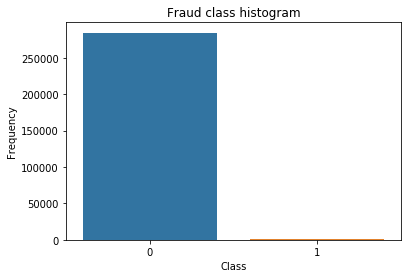

In [6]:
sns.countplot(df['Class'])
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

# Undersampling Technique 

Clearly the data is totally unbalanced!!

There are several ways to approach this classification problem taking into consideration this unbalance.

- Collect more data? Nice strategy but not applicable in this case

- Changing the performance metric:
 Precision, Recall or ROC curves - calculates sensitivity/specificity ratio.
 
- Resampling the dataset
Essentially this is a method that will process the data to have an approximate 50-50 ratio.
One way to achieve this is by UNDER-sampling, which deletes instances from the over-represented class (better when he have lot's of data)


In [7]:
#Find Number of samples which are Fraud

no_frauds = len(df[df['Class'] == 1])
no_frauds 

492

In [8]:
#Get indices of non fraud samples

non_fraud_indices = df[df.Class == 0].index


In [9]:
#Random sample non fraud indices

random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
len(random_indices)

492

In [10]:
#Find the indices of fraud samples

fraud_indices = df[df.Class == 1].index


In [11]:
#Concat fraud indices with sample non-fraud ones

under_sample_indices = np.concatenate([fraud_indices,random_indices])

In [12]:
#Get Balance Dataframe

data = df.loc[under_sample_indices]

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [14]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data[['Amount']])
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.421852
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.751610
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.563930
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.179443
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.417743


In [15]:
#data = data.drop(['Time'],axis=1)


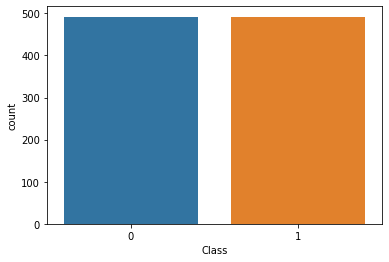

In [17]:
# Visualising Undersampled Data

sns.countplot(data['Class'])

## Predictive Modeling
Separate the attributes (features used to predict) from the target (outcome to predict)
Shuffle the order of the rows in the dataset, then separate into a dataset for training (for the model to learn from) and testing (to see how well it predicts with new data)

In [18]:
# 'lass' is target variable
y = data['Class']

In [19]:
# attributes are all the columns EXCEPT 'Class'
X = data.drop(['Class'], axis=1)

In [20]:
# separate 80% for training data, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Classifier

The `LogisticRegression()` function will take the `X_train` and `y_train` dataset, and calculate the attributes' parameters (weights) and sigmoid line shape that best fits the data.

In [21]:
# assign logistic regression function to variable
model1 = LogisticRegression()

In [22]:
# give training data to learn
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# overall ratio of correct predictions for training data
model1.score(X_train, y_train)

0.951715374841169

### Evaluate the model on test data
To assess how well the model will perform on new data, we will use the test set to:

Display the ratio of overall correct predictions
Compare the number of correct and incorrect predictions for each target category
Compare the ratio of correct predictions for all actual target values and all predicted values for a category

In [25]:
# overall ratio of correct predictions for test data
model1.score(X_test, y_test)

0.949238578680203

In [26]:
# generate predictions
y_pred = model1.predict(X_test)

In [28]:
# compare how many items in each category model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted: not fraud ', 'Predicted: fraud '],
    index=['Actual: not fraud ', 'Actual: fraud ']
)

cm

,Predicted: not fraud,Predicted: fraud
Actual: not fraud,94,4
Actual: fraud,6,93


In [29]:
# compare ratio of correct predictions vs all predicted values for each category (precision)
# compare ratio of correct predictions vs all actual values for each category (recall)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        98
           1       0.96      0.94      0.95        99

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



# Decision Tree Classifier

The `DecisionTreeClassifier()` function will take the X_train and y_train dataset, and calculate the attributes' segmented groups and probabilities that best fits the data.

In [31]:
# assign decision tree function to variable
model2 = DecisionTreeClassifier()

In [32]:
# give training data to learn
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
# overall ratio of correct predictions for training data
model2.score(X_train, y_train)

1.0

#### Evaluate the model on test data

To assess how well the model will perform on new data, we will use the test set to:

- Display the ratio of overall correct predictions
- Compare the number of correct and incorrect predictions for each target category
- Compare the ratio of correct predictions for all actual target values and all predicted values for a category

In [34]:
# overall ratio of correct predictions for test data
model2.score(X_test, y_test)

0.8781725888324873

In [36]:
# generate predictions
y_pred = model2.predict(X_test)

In [37]:
# compare how many items in each category model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted: no fraud ', 'Predicted: fraud '],
    index=['Actual: no fraud ', 'Actual: fraud ']
)

cm

,Predicted: no fraud,Predicted: fraud
Actual: no fraud,85,13
Actual: fraud,11,88


In [38]:
# compare ratio of correct predictions vs all predicted values for each category (precision)
# compare ratio of correct predictions vs all actual values for each category (recall)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        98
           1       0.87      0.89      0.88        99

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197



# KNeighbors Classifier
The KNeighborsClassifier()looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point.

In [39]:
# assign decision tree function to variable
model3 = KNeighborsClassifier()

In [40]:
# give training data to learn
model3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
# overall ratio of correct predictions for training data
model3.score(X_train, y_train)

0.9529860228716646

#### Evaluate the model on test data

To assess how well the model will perform on new data, we will use the test set to:

- Display the ratio of overall correct predictions
- Compare the number of correct and incorrect predictions for each target category
- Compare the ratio of correct predictions for all actual target values and all predicted values for a category

In [42]:
# overall ratio of correct predictions for test data
model3.score(X_test, y_test)

0.9441624365482234

In [43]:
# generate predictions
y_pred = model3.predict(X_test)

In [44]:
# compare how many items in each category model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted: no fraud ', 'Predicted: fraud '],
    index=['Actual: no fraud ', 'Actual: fraud ']
)

cm

,Predicted: no fraud,Predicted: fraud
Actual: no fraud,96,2
Actual: fraud,9,90


In [45]:
# compare ratio of correct predictions vs all predicted values for each category (precision)
# compare ratio of correct predictions vs all actual values for each category (recall)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        98
           1       0.98      0.91      0.94        99

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



# Conclusion

The project involved analysis of the credit card fraud detection dataset with proper data processing. Then, 3 models were trained and tested with maximum scores as follows:

- Logistic Regression Classifier: 94.9%
- Decision Tree Classifier: 87.8%
- KNeighbors Classifie: 94.4%

## Logistic Regression Classifier scored the best score of 94.9% .
